In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3SpM-0403LASSOdemo/'
FileBaseName = '3SpM-0403LASSOdemo'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
import sklearn.preprocessing as prep
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3SpM-0403LASSOdemo/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3SpM-0403LASSOdemo/


SpMのデモンストレーション
* 線形写像: $
\boldsymbol{y}
\approx
\mathbf{X}
\,
\boldsymbol{\omega}
$
  * $N=100$ : $\boldsymbol{\omega}$ の次元
  * $NonZero=10$ : $\boldsymbol{\omega}$ の内、非ゼロ成分の個数(スパースを想定)
  * $M=50$ : $\boldsymbol{y}$ の次元

In [4]:
############################################
N = 100
#
NonZero = 10
#
M = 50

* $\boldsymbol{\omega}$ の非ゼロ成分を用意する。
  * 標準偏差 3 の正規分布乱数で作成(デモ用)
  * $\boldsymbol{\omega}$の要素の内、非ゼロの要素の位置は乱数で決める。

In [5]:
############################################
np.random.seed(2033) # デモ用に乱数のシードを固定
############################################
omega_sd = 3
#
omega = np.zeros( N )
#
for i in range(NonZero):
  ii = int( np.floor( N * np.random.rand() ) )
  omega[ ii ]  = omega_sd * np.random.randn()
#
print( omega )

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.91200723  0.          0.
  0.          0.          0.          0.          1.17433364  0.
  0.          0.         -0.2868029   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -4.85363867  0.          0.          0.
  0.          0.         -4.9550583   0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.21499476  0.          0.         -1.78315353  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -4.74209025  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.26679489  0.          0.          0.
  0.          0.         

* $\boldsymbol{\omega}$ を描くグラフ

In [6]:
############################################
# omega_sets = [ [ omega_data, label_str, color, marker ], ... ]
############################################
def figaxis_omega( axis, omega_sets ):
  #
  # 横軸
  x_ = np.zeros( N )
  for idx in range( N ):
    x_[ idx ] = idx
  #
  axis.set_xlim( 0, N )
  axis.set_xlabel( 'Bases-Index' )
  #
  # 縦軸
  axis.set_ylabel( r'$\omega$' )
  #
  ymax = 0.0
  ymin = 0.0
  #
  for omega_set in omega_sets:
    #
    # omega_sets = [ [ omega_data, label_str, color, marker ], ... ]
    omega_  = omega_set[ 0 ]
    label_  = omega_set[ 1 ]
    color_  = omega_set[ 2 ]
    marker_ = omega_set[ 3 ]
    #
    # 全てのデータで 縦軸の最大値
    ymax_ = np.amax( omega_ )
    if ymax_ > ymax:
      ymax = ymax_
    #
    # 全てのデータで 縦軸の最小値
    ymin_ = np.amin( omega_ )
    if ymin_ < ymin:
      ymin = ymin_
    #
    # グラフの描画
    axis.scatter( x_, omega_, label=label_, color=color_, marker=marker_, s=10 )
  #
  # y軸の範囲設定
  ymax = max( np.abs( ymax ), np.abs( ymin ) )
  #
  axis.set_ylim( - 1.4 * ymax, + 1.4 * ymax )
  #
  # 凡例
  axis.legend(loc='upper right')
  #
  return

############################################
def Grf_omega( omega_sets ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,4))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15,wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  figaxis_omega( ax1, omega_sets )
  #
  plt.title( r'$\bf\omega$' )
  #
  ####################
  # グラフの出力
  plt.show()
  #
  return fig

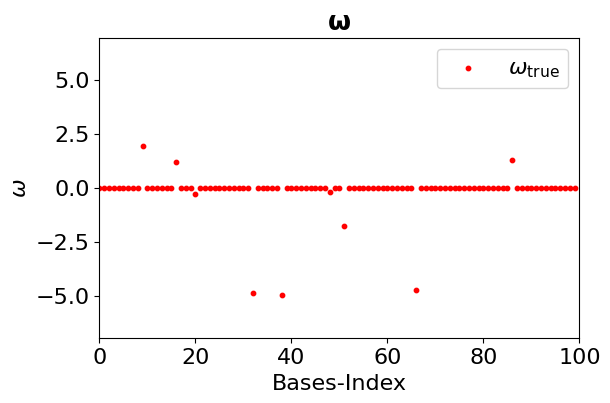

In [7]:
############################################
omega_sets = [ [ omega, r'$\omega_{\rm true}$', 'red', 'o' ] ]
############################################
fig = Grf_omega( omega_sets )
#
fig.savefig( FilePath + FileBaseName + '-omega-true.pdf' )

* 計画行列 $\mathbf{X}$ を乱数で用意。

In [8]:
############################################
Xmat = np.random.rand( M, N )-0.5
#
print( Xmat )

[[-0.32243262  0.1137674   0.4681492  ...  0.08684513 -0.46754201
  -0.01349634]
 [-0.02867093 -0.24103412  0.05642246 ...  0.22249022 -0.32198143
  -0.39867103]
 [-0.38447412 -0.4119803  -0.13023703 ... -0.18582647 -0.15010964
  -0.13848237]
 ...
 [ 0.31645001 -0.43979072  0.30662418 ...  0.01028684 -0.36018147
  -0.4150439 ]
 [ 0.279066    0.28459824  0.26469168 ... -0.37660871  0.21991641
  -0.12492843]
 [ 0.34224738 -0.1907398  -0.13319599 ...  0.18406148  0.44074908
  -0.09131854]]


計画行列のヒートマップを描く関数

In [9]:
############################################
def Xmat_HeatMap( Xmat_ ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,4))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15, wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  heatmap = ax1.pcolor( Xmat_, cmap=plt.cm.bwr)
  #
  ax1.set_ylabel( r'$y_{m}\quad(m=0\sim$%d)' % M )
  ax1.set_xlabel( r'$\omega_{n}\quad(n=0\sim$%d)' % N )
  #
  plt.title( r'$\mathbf{X}$' )
  #
  plt.show()
  #
  return fig
############################################
def Xmat_HeatMap_Gray( Xmat_ ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,4))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15, wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  # heatmap = ax1.pcolor( Xmat_, cmap=plt.cm.bwr)
  heatmap = ax1.pcolor( Xmat_, cmap='gist_gray')
  #
  ax1.set_ylabel( r'$y_{m}\quad(m=0\sim$%d)' % M )
  ax1.set_xlabel( r'$\omega_{n}\quad(n=0\sim$%d)' % N )
  #
  plt.title( r'$\mathbf{X}$' )
  #
  plt.show()
  #
  return fig

計画行列のヒートマップを描く

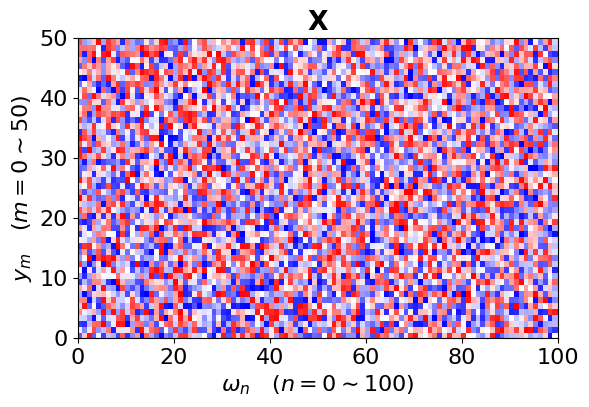

In [10]:
############################################
fig = Xmat_HeatMap( Xmat )
#
fig.savefig( FilePath + FileBaseName + '-Xmat.pdf' )

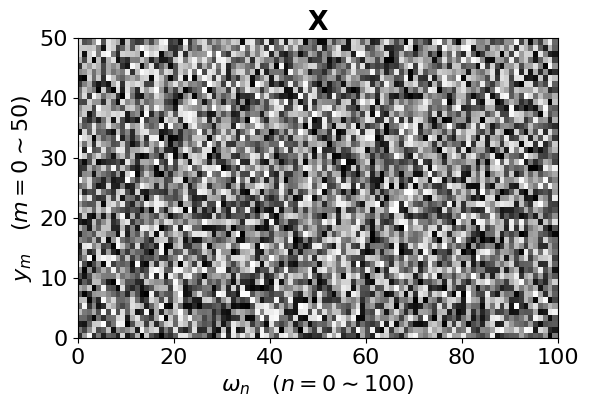

In [11]:
############################################
fig = Xmat_HeatMap_Gray( Xmat )
#
fig.savefig( FilePath + FileBaseName + '-Xmat-gray.pdf' )

* デモンストレーション用に、計画行列 $\mathbf{X}$ と$\boldsymbol{\omega}$を用いて、解析対象データ$\boldsymbol{y}$を用意する。
$$
\boldsymbol{y} = \mathbf{X}\,\boldsymbol{\omega}
$$

In [12]:
############################################
y_true = np.dot( Xmat, omega )
#
sigma_noise = 1.0 # 0.2
y_data = y_true + sigma_noise * np.random.randn(M)

$\boldsymbol{y}$のグラフを描く関数

In [13]:
############################################
# y_sets = [ [ y_data, label_str, color, marker ], ... ]
############################################
def figaxis_ydata( axis, y_sets ):
  #
  # 横軸
  x_ = np.zeros( M )
  for idx in range( M ):
    x_[ idx ] = idx
  #
  axis.set_xlim( 0, M )
  axis.set_xlabel( 'Data-Index' )
  #
  # 縦軸
  axis.set_ylabel( r'${\bf y}$' )
  #
  ymax = 0.0
  ymin = 0.0
  #
  for y_set in y_sets:
    #
    # y_sets = [ [ y_data, label_str, color, marker ], ... ]
    y_      = y_set[ 0 ]
    label_  = y_set[ 1 ]
    color_  = y_set[ 2 ]
    marker_ = y_set[ 3 ]
    #
    # 全てのデータで 縦軸の最大値
    ymax_ = np.amax( y_ )
    if ymax_ > ymax:
      ymax = ymax_
    #
    # 全てのデータで 縦軸の最小値
    ymin_ = np.amin( y_ )
    if ymin_ < ymin:
      ymin = ymin_
    #
    # グラフの描画
    axis.scatter( x_, y_, label=label_, color=color_, marker=marker_, s=10 )
  #
  # y軸の範囲設定
  ymax = max( np.abs( ymax ), np.abs( ymin ) )
  #
  axis.set_ylim( - 1.6 * ymax, + 1.6 * ymax )
  #
  # 凡例
  axis.legend(loc='upper right')
  #
  return

############################################
def Grf_ydata( y_sets ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,4))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15,wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  figaxis_ydata( ax1, y_sets )
  #
  plt.title( r'${\bf y}$' )
  #
  ####################
  # グラフの出力
  plt.show()
  #
  return fig

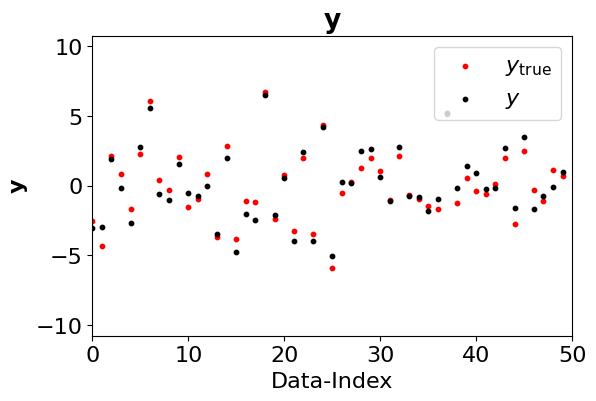

In [14]:
############################################
y_sets = [ [ y_true, r'$y_{\rm true}$', 'red',   'o' ],
           [ y_data, r'$y$',            'black', 'o' ]]
############################################
fig = Grf_ydata( y_sets )
#
fig.savefig( FilePath + FileBaseName + '-ydata-true.pdf' )

$\boldsymbol{\omega}$の非ゼロ成分数を返す関数

In [15]:
############################################
def get_L0( omega_ ):
  return np.linalg.norm( omega_, ord=0 )

LASSO回帰
$$
\hat{\boldsymbol{\omega}}
=
{\rm arg min}_{\boldsymbol{\omega}}
\left(
  \frac{1}{2M}
  \left\|
  \boldsymbol{y}
  -
  \boldsymbol{X}
  \boldsymbol{\omega}
  \right\|_2^2
  +
  \alpha
  \left\|
  \boldsymbol{\omega}
  \right\|_1
\right)
$$
* Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


2. $\hat{\boldsymbol{\omega}}$を使った再現データ
$$
\hat{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\omega}}+切片
$$

In [16]:
############################################
y_target = y_data
############################################
a = 0.5
#
lasso = lm.Lasso(alpha=a, fit_intercept=True, max_iter=100000)
lasso.fit( Xmat, y_target )
#
print( 'alpha = %.3E' % a )
print( ' lasso.intercept_ = ', lasso.intercept_    )
print( ' L0(lasso.coef_)  = ', get_L0(lasso.coef_) )
#
y_res = (Xmat @ lasso.coef_) + lasso.intercept_
print( ' RMSD = ', np.std( y_res - y_target ))
#
############################################
a = 0.0005
#
lasso = lm.Lasso(alpha=a, fit_intercept=True, max_iter=100000)
lasso.fit( Xmat, y_target )
#
print( 'alpha = %.3E' % a )
print( ' lasso.intercept_ = ', lasso.intercept_    )
print( ' L0(lasso.coef_)  = ', get_L0(lasso.coef_) )
#
y_res = (Xmat @ lasso.coef_) + lasso.intercept_
print( ' RMSD = ', np.std( y_res - y_target ))
#

alpha = 5.000E-01
 lasso.intercept_ =  0.034610131476395314
 L0(lasso.coef_)  =  0.0
 RMSD =  2.5793106928780767
alpha = 5.000E-04
 lasso.intercept_ =  0.2447571231115363
 L0(lasso.coef_)  =  55.0
 RMSD =  0.014817568590296502


$\alpha$のテーブルを準備
* $\alpha=5\times10^{-4}\sim5\times10^{-1}$で等比数列で用意
* 個数は100個

In [17]:
############################################
alpha_min = 4.0E-3 # 5.0E-4
alpha_max = 4.0E-1
#
n_alphas = 50 # 100 # 200
alphas = np.logspace( np.log10(alpha_min), np.log10(alpha_max), n_alphas)
#
#大きい方から
alphas = alphas[::-1]
#
print(alphas)

[0.4        0.36411927 0.33145711 0.3017248  0.27465954 0.25002208
 0.22759464 0.20717899 0.18859465 0.17167737 0.1562776  0.14225921
 0.1294983  0.11788207 0.10730783 0.09768212 0.08891986 0.08094359
 0.0736828  0.06707332 0.06105672 0.05557982 0.05059421 0.04605582
 0.04192453 0.03816382 0.03474045 0.03162417 0.02878743 0.02620514
 0.02385449 0.0217147  0.01976685 0.01799373 0.01637966 0.01491037
 0.01357289 0.01235537 0.01124707 0.01023819 0.00931981 0.0084838
 0.00772279 0.00703004 0.00639943 0.00582539 0.00530285 0.00482717
 0.00439416 0.004     ]


$\alpha$テーブルに従って、lasso回帰を繰り返す
1. LASSO回帰
$$
\hat{\boldsymbol{\omega}}
=
{\rm arg min}_{\boldsymbol{\omega}}
\left(
  \left||
  \boldsymbol{y}
  -
  \boldsymbol{X}
  \boldsymbol{\omega}
  \right||_2^2
  +
  \alpha
  \left||
  \boldsymbol{\omega}
  \right||_1
\right)
$$
* Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


2. $\hat{\boldsymbol{\omega}}$を使った再現データ
$$
\hat{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\omega}}+切片
$$

3. 以下の残差を求める
* 解析対象データ(ノイズ重畳)$\boldsymbol{y}$に対する、$\hat{\boldsymbol{y}}$の残差
* 真値データ$\boldsymbol{y}_{\rm true}$に対する、$\hat{\boldsymbol{y}}$の残差。但し計測データでは、真値データは不明なので、この残差はわからない。
* 真値の$\boldsymbol{\omega}_{\rm true}$に対する$\hat{\boldsymbol{\omega}}$の残差。但し計測データでは、真値データは不明なので、この残差はわからない。

In [18]:
############################################
y_target = y_data
############################################
y_target_std = []
y_true_std   = []
y_regs       = []
coefs        = []
L0           = []
#
print( 'sigma_noise = %.3E' % sigma_noise )
#
for a in alphas:
  #
  # lasso回帰
  lasso = lm.Lasso(alpha=a, fit_intercept=True, max_iter=100000)
  lasso.fit( Xmat, y_target )
  #
  # 回帰係数
  coefs.append( lasso.coef_ )
  #
  # 非ゼロ要素数
  L0_ = get_L0( lasso.coef_ )
  L0.append( L0_ )
  #
  # 再現データ
  y_res = Xmat @ lasso.coef_ + lasso.intercept_
  y_regs.append( y_res )
  #
  # 残差
  y_target_RMSD = np.std( (y_target - y_res) )
  y_true_RMSD   = np.std( (y_true   - y_res) )
  y_target_std.append( y_target_RMSD )
  y_true_std.append(   y_true_RMSD   )
  #
  print( ' a=%.2E, L0=%3d, RMSD(target)=%.2E, RMSD(true)=%.2E' % (a, L0_, y_target_RMSD, y_true_RMSD) )


sigma_noise = 1.000E+00
 a=4.00E-01, L0=  0, RMSD(target)=2.58E+00, RMSD(true)=2.54E+00
 a=3.64E-01, L0=  2, RMSD(target)=2.52E+00, RMSD(true)=2.48E+00
 a=3.31E-01, L0=  3, RMSD(target)=2.39E+00, RMSD(true)=2.34E+00
 a=3.02E-01, L0=  3, RMSD(target)=2.23E+00, RMSD(true)=2.17E+00
 a=2.75E-01, L0=  3, RMSD(target)=2.09E+00, RMSD(true)=2.03E+00
 a=2.50E-01, L0=  3, RMSD(target)=1.97E+00, RMSD(true)=1.90E+00
 a=2.28E-01, L0=  4, RMSD(target)=1.86E+00, RMSD(true)=1.77E+00
 a=2.07E-01, L0=  4, RMSD(target)=1.75E+00, RMSD(true)=1.65E+00
 a=1.89E-01, L0=  4, RMSD(target)=1.65E+00, RMSD(true)=1.54E+00
 a=1.72E-01, L0=  6, RMSD(target)=1.56E+00, RMSD(true)=1.44E+00
 a=1.56E-01, L0=  6, RMSD(target)=1.46E+00, RMSD(true)=1.33E+00
 a=1.42E-01, L0=  6, RMSD(target)=1.37E+00, RMSD(true)=1.23E+00
 a=1.29E-01, L0=  6, RMSD(target)=1.30E+00, RMSD(true)=1.15E+00
 a=1.18E-01, L0=  6, RMSD(target)=1.23E+00, RMSD(true)=1.07E+00
 a=1.07E-01, L0=  7, RMSD(target)=1.17E+00, RMSD(true)=1.00E+00
 a=9.77E-02, L0=

回帰係数のグラフを描く関数

In [19]:
############################################
def figaxis_LASSO_coef( axis, alphas_, coefs_ ):
  #
  # Coefficients
  coefs_max = np.amax( np.abs( coefs_ ) )
  axis.plot( alphas_, coefs_ )
  #
  axis.set_xscale('log')
  axis.set_xlabel( r'$\alpha$' )
  #
  axis.set_ylabel( r'Coefficients $\bf\omega$' )
  axis.set_ylim( -1.2 * coefs_max, 1.2 * coefs_max )
  #
  return
#
############################################
def Grf_LASSO_coef( alphas_, coefs_ ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,6))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15,wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  figaxis_LASSO_coef( ax1, alphas_, coefs_ )
  #
  plt.title( r'Coefficient ${\bf\omega}$' )
  #
  ####################
  # グラフの出力
  plt.show()
  #
  return fig

回帰係数のグラフ

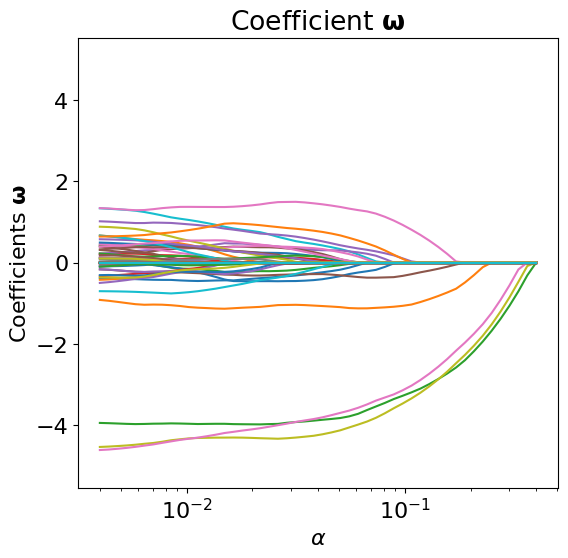

In [20]:
############################################
fig = Grf_LASSO_coef( alphas, coefs )
#
fig.savefig( FilePath + FileBaseName + '-LASSO-coef.pdf' )

回帰係数のグラフとL0を描く関数

In [21]:
############################################
def Grf_LASSO_coef_LO( alphas_, coefs_, LOs_, L0counts=8 ):
  #
  boxdic = { "facecolor" : "white", "edgecolor" : "black",
             "boxstyle"  : "Round", "linewidth" : 1,
             "alpha"     : 0.75 }
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(6,6))
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15,wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  figaxis_LASSO_coef( ax1, alphas_, coefs_ )
  #
  ####################
  alphas_len = len( alphas_ )
  idx_step   = alphas_len // L0counts
  #
  ax1_bot, ax1_top = ax1.set_ylim()
  #
  idx = 0
  while idx < alphas_len:
    #
    alpha_ = alphas_[idx]
    L0_    = LOs_[idx]
    #
    ax1.axvline( alpha_, ax1_bot, ax1_top, linestyle='dotted', color='black', linewidth=0.75 )
    #
    alpha_text = r'$L_{0}=%d$' % L0_
    ax1.text( alpha_, ax1_bot + 0.97*(ax1_top-ax1_bot), alpha_text,
              fontsize=12, rotation=90,
              horizontalalignment='center', verticalalignment='top',
              color='black',bbox = boxdic)
    #
    idx = idx + idx_step
  #
  ####################
  plt.title( r'Paths: Coefficient ${\bf\omega}$' )
  #
  ####################
  # グラフの出力
  plt.show()
  #
  return fig

回帰係数とL0のグラフ

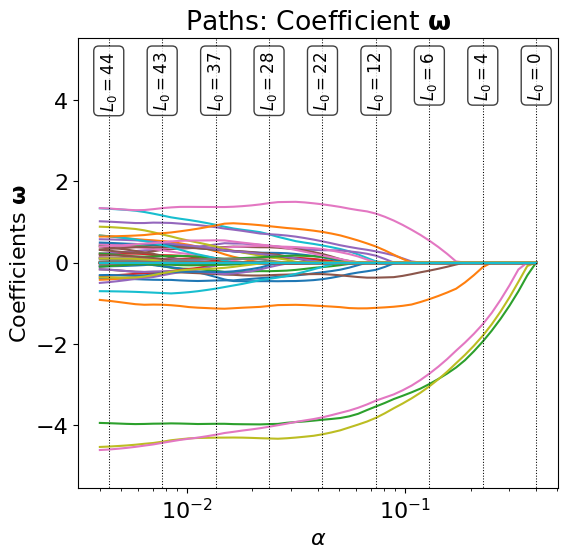

In [22]:
############################################
fig = Grf_LASSO_coef_LO( alphas, coefs, L0 )
#
fig.savefig( FilePath + FileBaseName + '-LASSO-coef-L0.pdf' )

RMSDとL0のグラフを描く関数

In [23]:
############################################
# y_stds_ = [ [type, y_std, label, color] ]
#   type   0: scatter
#   type   1: horizontal line
############################################
def figaxis_LASSO_RMSD_L0( axis, alphas_, y_stds_, L0_ ):
  #
  # x: alpha
  axis.set_xscale('log')
  axis.set_xlabel( r'$\alpha$' )
  #
  # RMSD
  std_max = 0
  #
  for y_data_std_ in y_stds_:
    #
    type_  = y_data_std_[ 0 ]
    y_std_ = y_data_std_[ 1 ]
    label_ = y_data_std_[ 2 ]
    color_ = y_data_std_[ 3 ]
    #
    if type_ == 0:
      std_max_ = np.amax( y_std_ )
      if std_max_ > std_max:
        std_max = std_max_
      #
      axis.scatter( alphas_, y_std_,label=label_, color=color_, s=10)
      #
    elif type_ == 1:
      #
      axis.axhline( y_std_, label=label_, color=color_, linestyle='dashed')
      #
  #
  axis.set_ylim( 0, 1.3 * std_max)
  axis.set_ylabel('RMSD')
  #
  axisline, axislabel = axis.get_legend_handles_labels()
  #
  ###########
  # L0の軸
  ax2 = axis.twinx()
  #
  ax2.spines['right'].set_color('green')
  ax2.tick_params(axis = 'y', colors ='green')
  ax2.set_ylabel( r'$L_{0}$', color='green' )
  ax2.set_ylim( 0, 1.2 * np.amax( L0_ ) )
  #
  # L0
  ax2.scatter( alphas_, L0_, label=r'$L_{0}$', color='green')
  #
  ax2line, ax2label = ax2.get_legend_handles_labels()
  #
  plt.legend(axisline+ax2line, axislabel+ax2label, bbox_to_anchor=(0.5, 1.0), loc='upper center')
  #
  return
#
############################################
def Grf_LASSO_RMSD_L0( alphas_, y_stds_, L0_ ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(7,6))
  #
  fig.subplots_adjust(left=0.13, right=0.87, top=0.9, bottom=0.15,wspace=0.25 )
  #
  ####################
  ax1 = fig.add_subplot(1,1,1)
  #
  figaxis_LASSO_RMSD_L0( ax1, alphas_, y_stds_, L0_ )
  #
  plt.title( r'RMSD / $L_{0}$' )
  #
  ####################
  # グラフの出力
  plt.show()
  #
  return fig

RMSDとL0のグラフ

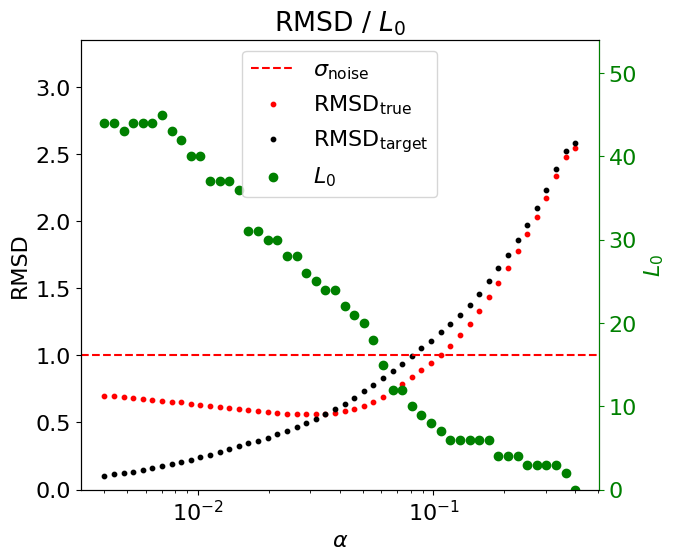

In [24]:
############################################
# y_stds_ = [ [type, y_std, label, color] ]
y_stds = [ [1, sigma_noise,  r'$\sigma_{\rm noise}$',      'red'   ],
           [0, y_true_std,   r'${\rm RMSD}_{\rm true}$',   'red'   ],
           [0, y_target_std, r'${\rm RMSD}_{\rm target}$', 'black' ] ]
############################################
fig = Grf_LASSO_RMSD_L0( alphas, y_stds, L0 )
#
fig.savefig( FilePath + FileBaseName + '-LASSO-RMSD-L0.pdf' )

LASSO解析のまとめグラフを描く関数

In [25]:
############################################
def Grf_LASSO_Summary( idx_ ):
  #
  ########################
  alpha       = alphas[ idx ]
  coef        = coefs[ idx ]
  y_reg       = y_regs[ idx ]
  L0_         = L0[ idx ]
  RMSD_target = y_target_std[ idx ]
  RMSD_true   = y_true_std[ idx ]
  #
  print( 'a=%.2E, L0=%3d, RMSD(target)=%.2E, RMSD(true)=%.2E' %
         (alpha, L0_, RMSD_target, RMSD_true) )
  #
  boxdic = { "facecolor" : "white", "edgecolor" : "blue",
             "boxstyle"  : "Round", "linewidth" : 1,
             "alpha"     : 0.75 }
  #
  ########################
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure(figsize=(25,5))
  #
  fig.subplots_adjust(left=0.05, right=0.99, top=0.92, bottom=0.12, wspace=0.3)
  #
  ########################
  # Coefficent を描画するグラフ
  ax1 = fig.add_subplot( 1, 4, 1 )
  #
  figaxis_LASSO_coef( ax1, alphas, coefs )
  #
  ax1ybot, ax1ytop = ax1.set_ylim()
  #
  # alphaの位置
  ax1.axvline( alpha, linestyle='dashed', color='blue' )
  #
  alpha_text = r'$\alpha=$%.1E, $L_{0}$=%3d'% (alpha, L0_)
  #
  ax1.text( alpha, ax1ybot + 0.1*(ax1ytop-ax1ybot),
             alpha_text,
             fontsize=12, rotation=90,
             horizontalalignment='center', verticalalignment='bottom',
             color='blue',bbox = boxdic)
  #
  plt.title( r'(a) Paths : Coefficient ${\bf\omega}$' )
  #
  ########################
  # L0、RMSDを描画するグラフ
  y_stds = [ [1, sigma_noise,  r'$\sigma_{\rm noise}$',      'red'   ],
             [0, y_true_std,   r'${\rm RMSD}_{\rm true}$',   'red'   ],
             [0, y_target_std, r'${\rm RMSD}_{\rm target}$', 'black' ] ]
  #
  ax2 = fig.add_subplot( 1, 4, 2 )
  #
  figaxis_LASSO_RMSD_L0( ax2, alphas, y_stds, L0 )
  #
  ax2ybot, ax2ytop = ax2.set_ylim()
  #
  # alphaの位置
  ax2.axvline( alpha, linestyle='dashed', color='blue' )
  #
  ax2.text( alpha, ax2ybot + 0.1*(ax2ytop-ax2ybot),
             alpha_text,
             fontsize=12, rotation=90,
             horizontalalignment='center', verticalalignment='bottom',
             color='blue',bbox = boxdic)
  #
  plt.title( r'(b) RMSD / $L_{0}$' )
  #
  ########################
  # omegaを描画するグラフ
  omega_sets = [ [ omega, r'$\omega_{\rm true}$',                 'red',  'o' ],
                 [ coef,  r'$\hat{\omega}$ (' + alpha_text + ')', 'blue', 'o' ]]
  #
  ax3 = fig.add_subplot( 1, 4, 3 )
  #
  figaxis_omega( ax3, omega_sets )
  #
  plt.title( r'(c) $\bf\omega$' )
  #
  ########################
  # y_dataを描画するグラフ
  y_sets = [ [ y_true, r'$y_{\rm true}$',    'red',   'o' ],
             [ y_data, r'$y$',               'black', 'o' ],
             [ y_reg,  r'$y(\hat{\omega})$', 'blue',  'o' ]]
  #
  ax4 = fig.add_subplot( 1, 4, 4 )
  #
  figaxis_ydata( ax4, y_sets )
  #
  plt.title( r'(d) ${\bf y}$' )
  #
  return fig

a=4.83E-03, L0= 43, RMSD(target)=1.23E-01, RMSD(true)=6.88E-01


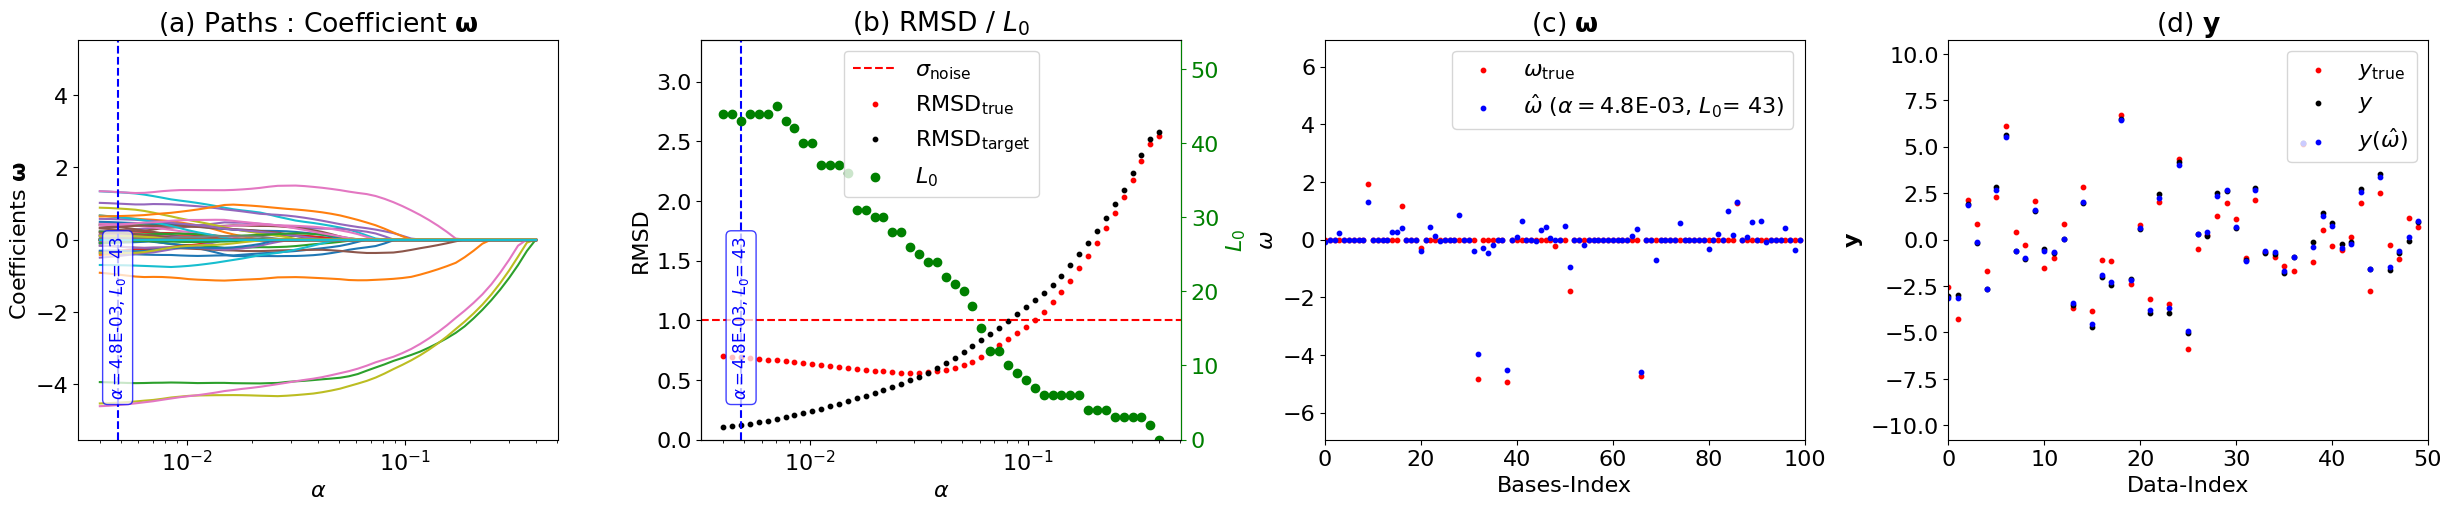

In [26]:
############################################
idx = 47
fig = Grf_LASSO_Summary( idx )
#
fig.savefig( FilePath + FileBaseName + '-LASSO-Summary-%03d.pdf' % idx )

alphaテーブルで5つおきにグラフ出力

a=4.00E-01, L0=  0, RMSD(target)=2.58E+00, RMSD(true)=2.54E+00
a=2.50E-01, L0=  3, RMSD(target)=1.97E+00, RMSD(true)=1.90E+00
a=1.56E-01, L0=  6, RMSD(target)=1.46E+00, RMSD(true)=1.33E+00
a=9.77E-02, L0=  8, RMSD(target)=1.11E+00, RMSD(true)=9.45E-01
a=6.11E-02, L0= 15, RMSD(target)=8.31E-01, RMSD(true)=6.92E-01
a=3.82E-02, L0= 24, RMSD(target)=5.97E-01, RMSD(true)=5.70E-01
a=2.39E-02, L0= 28, RMSD(target)=4.38E-01, RMSD(true)=5.65E-01
a=1.49E-02, L0= 36, RMSD(target)=3.23E-01, RMSD(true)=6.00E-01
a=9.32E-03, L0= 40, RMSD(target)=2.22E-01, RMSD(true)=6.41E-01
a=5.83E-03, L0= 44, RMSD(target)=1.45E-01, RMSD(true)=6.76E-01


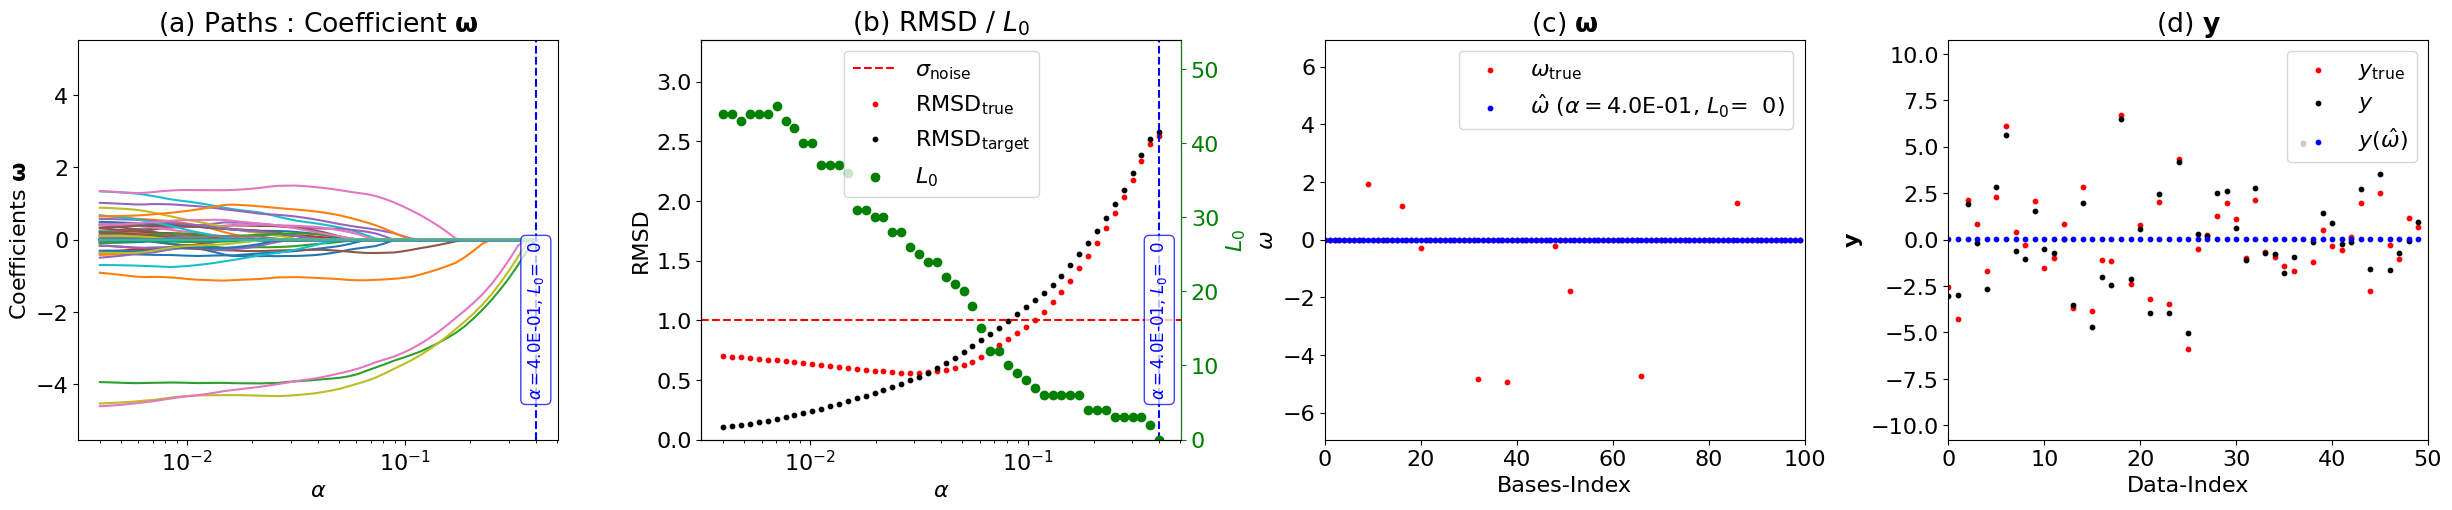

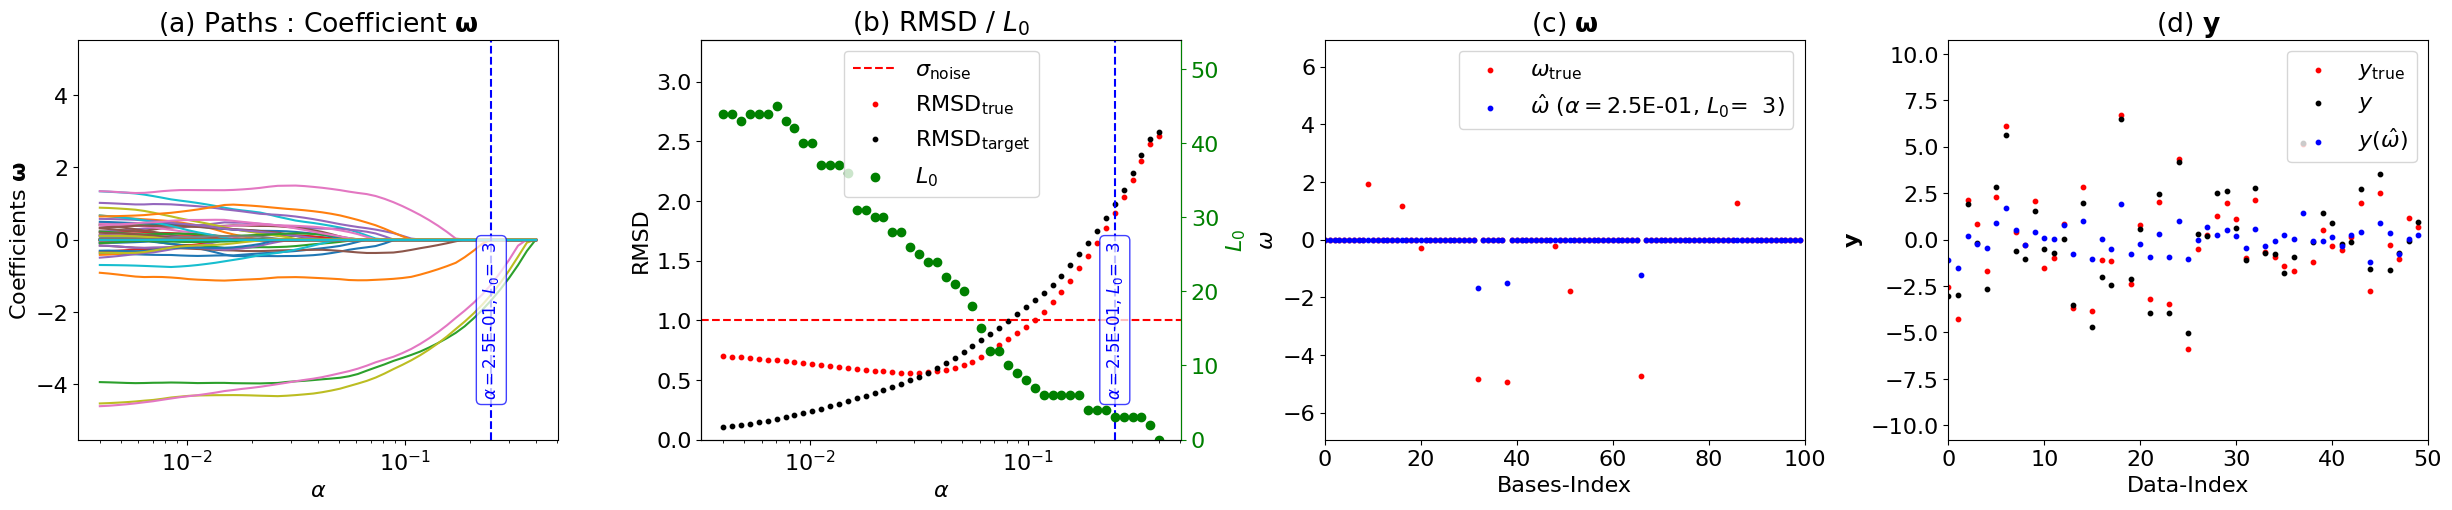

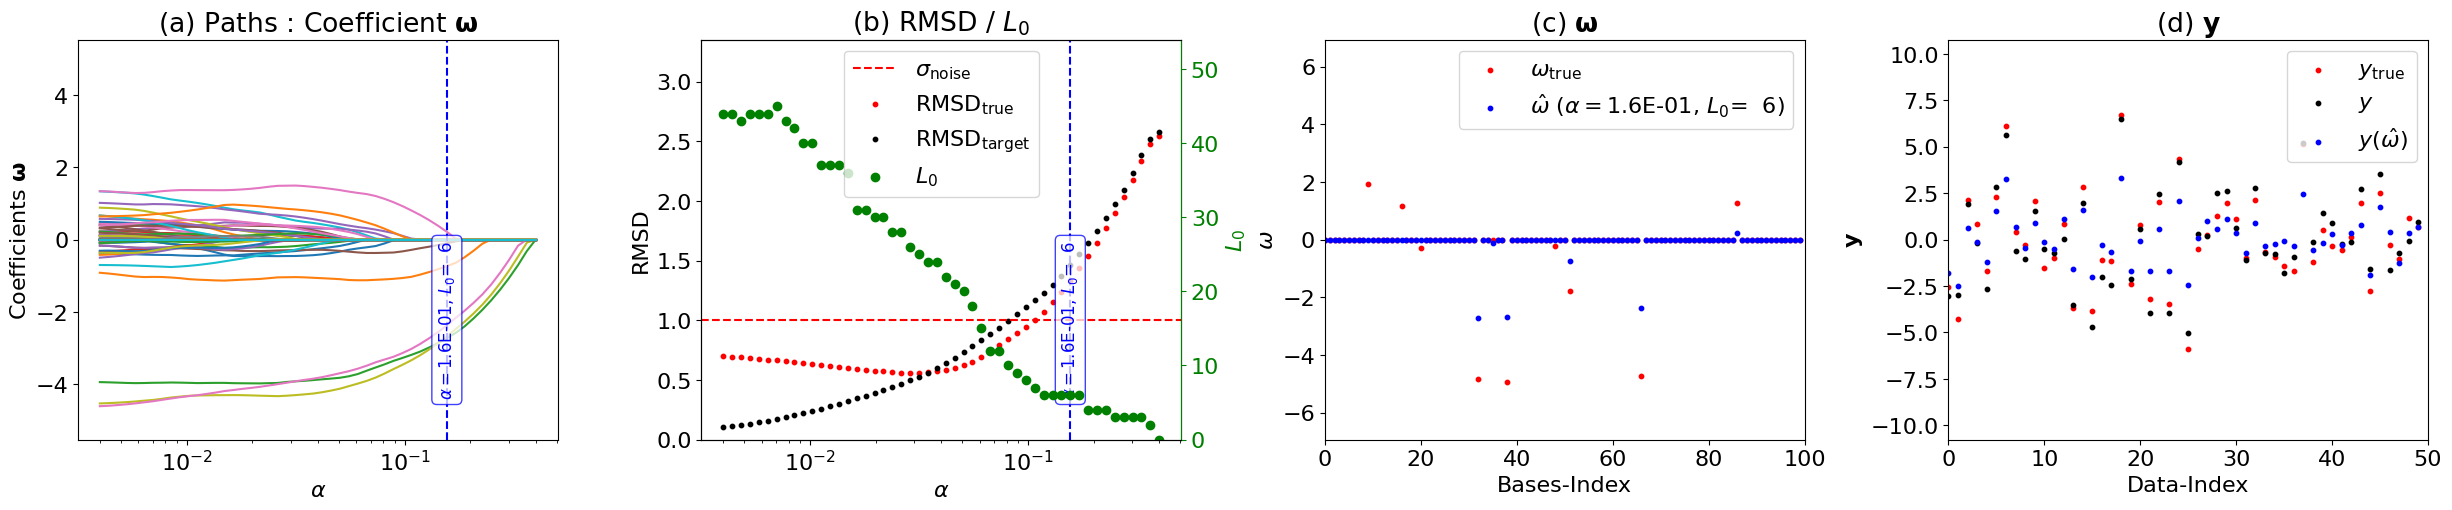

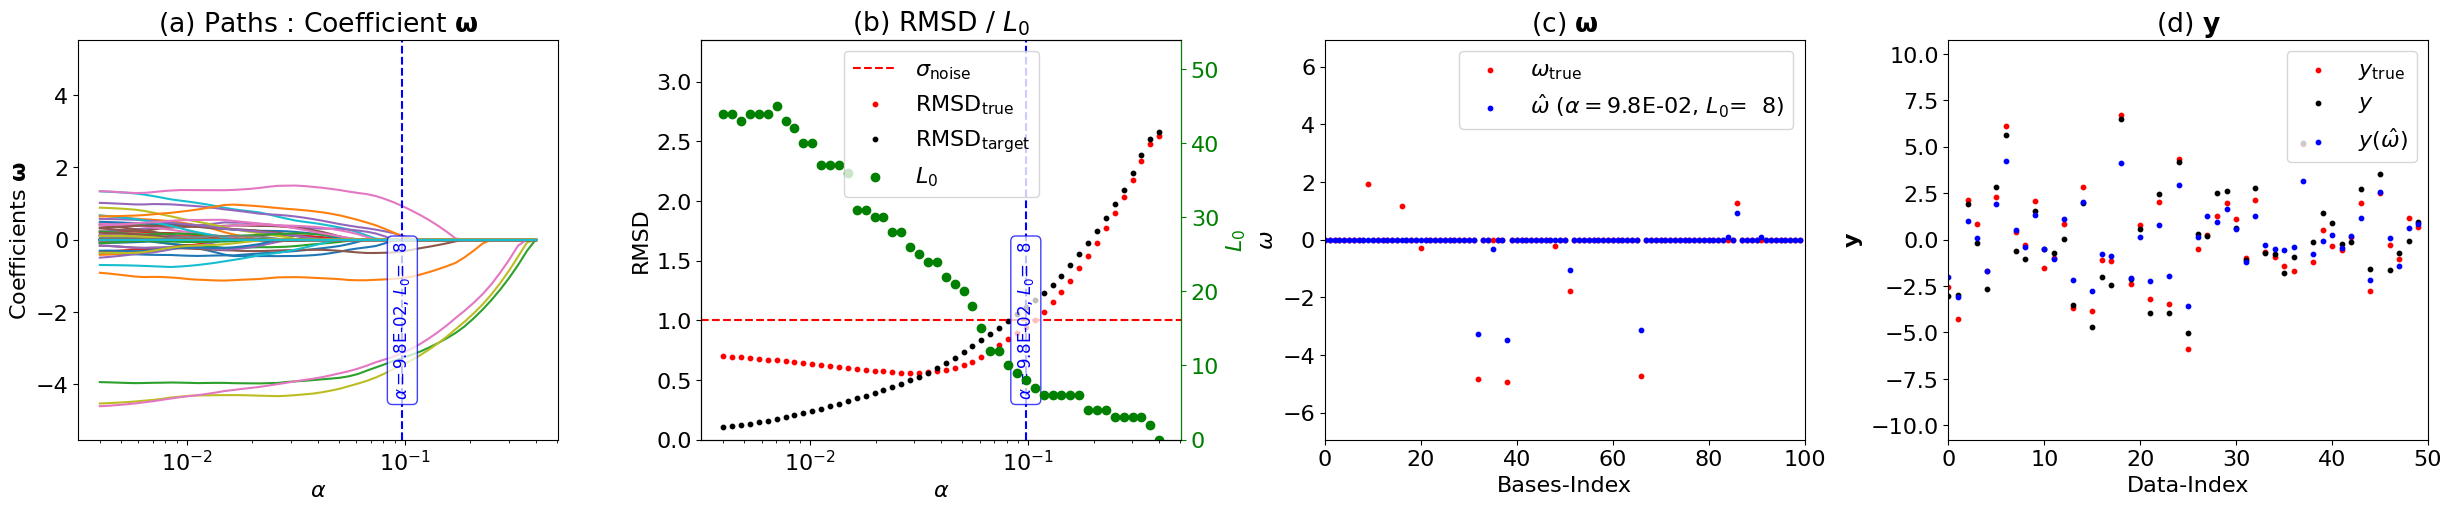

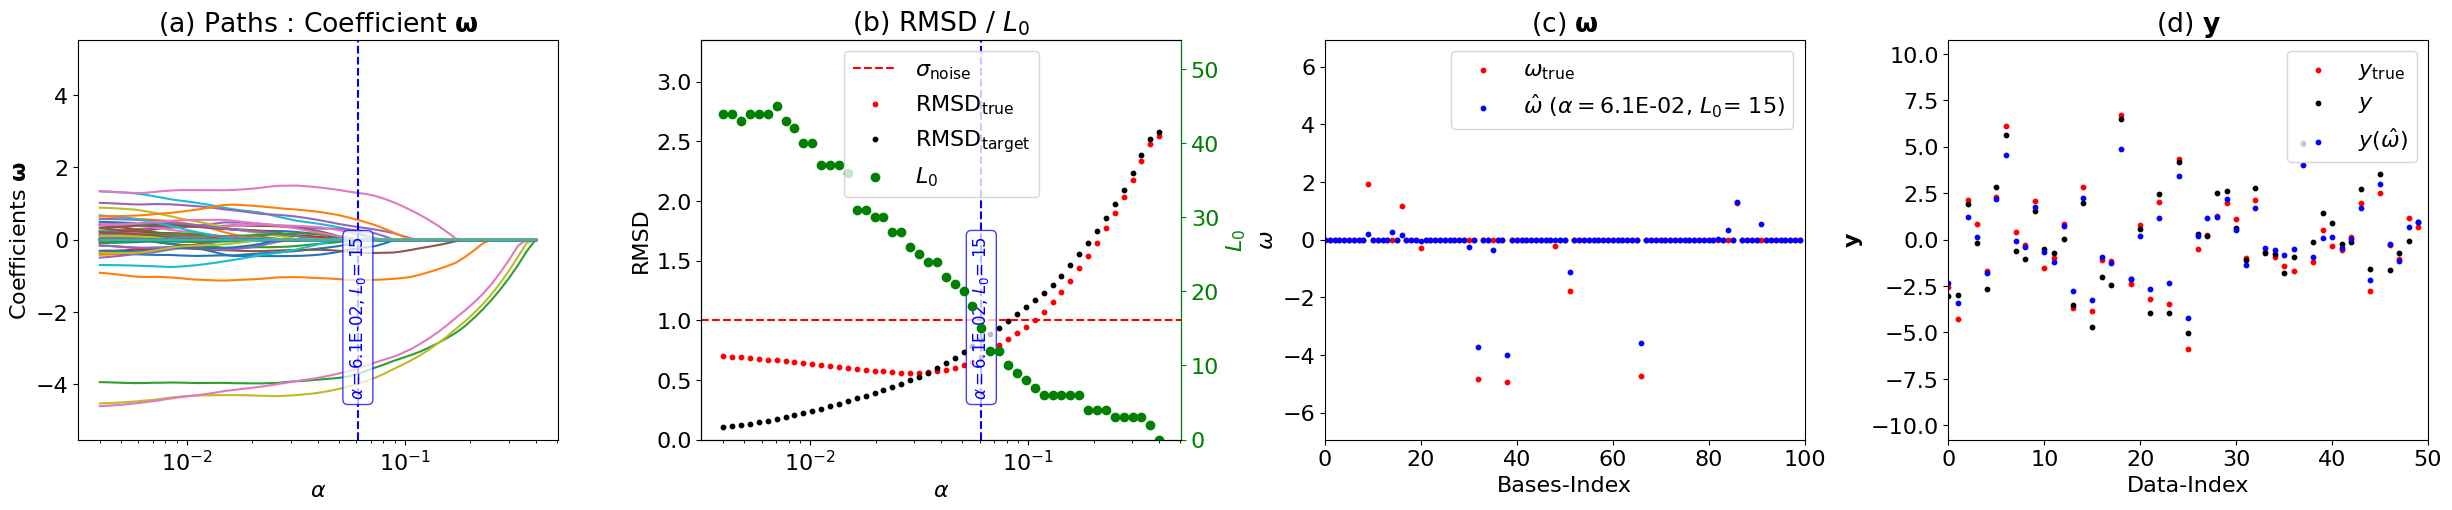

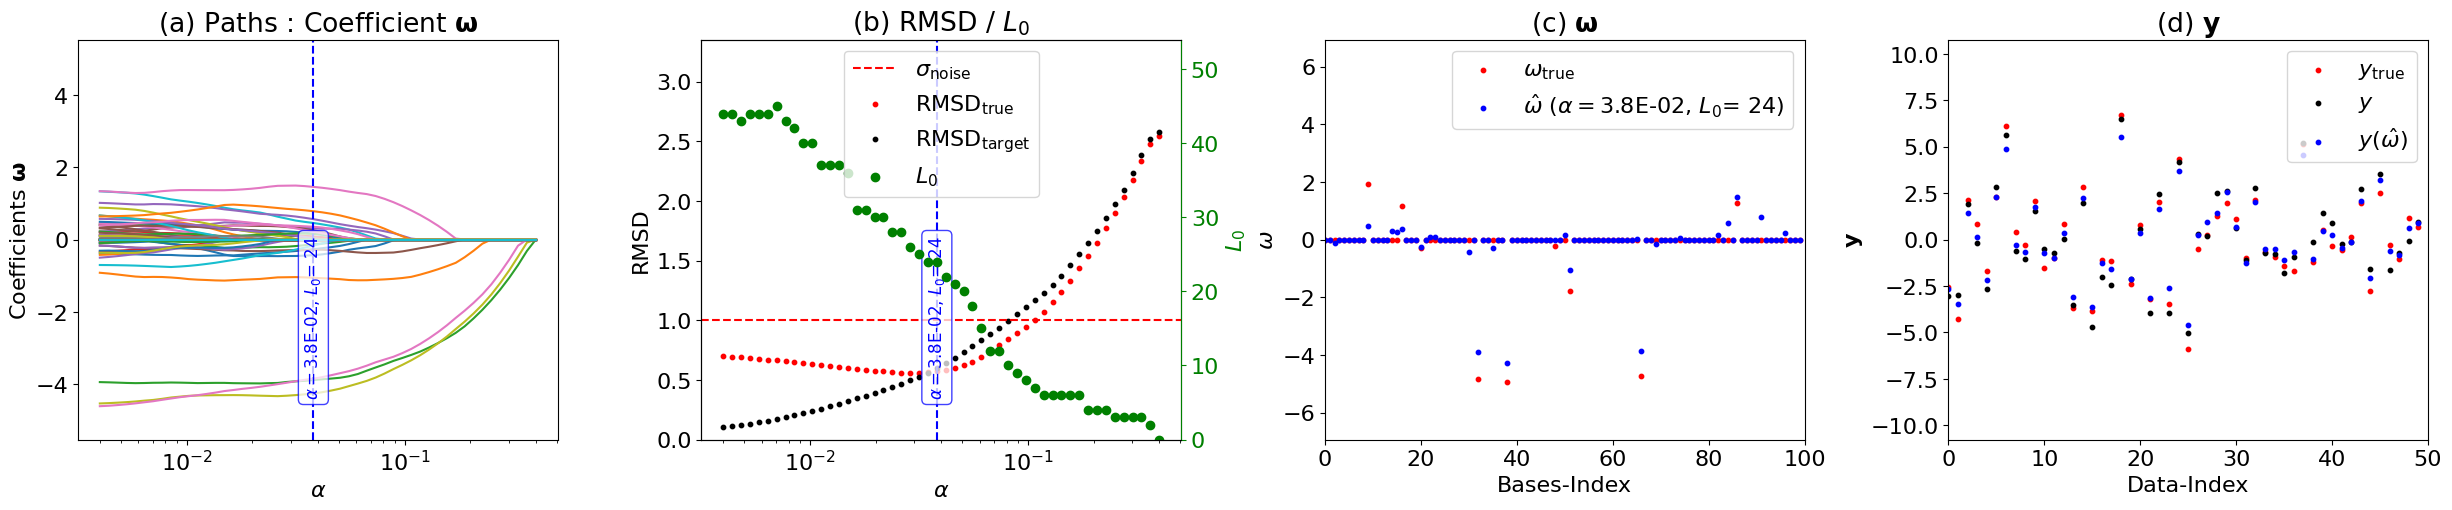

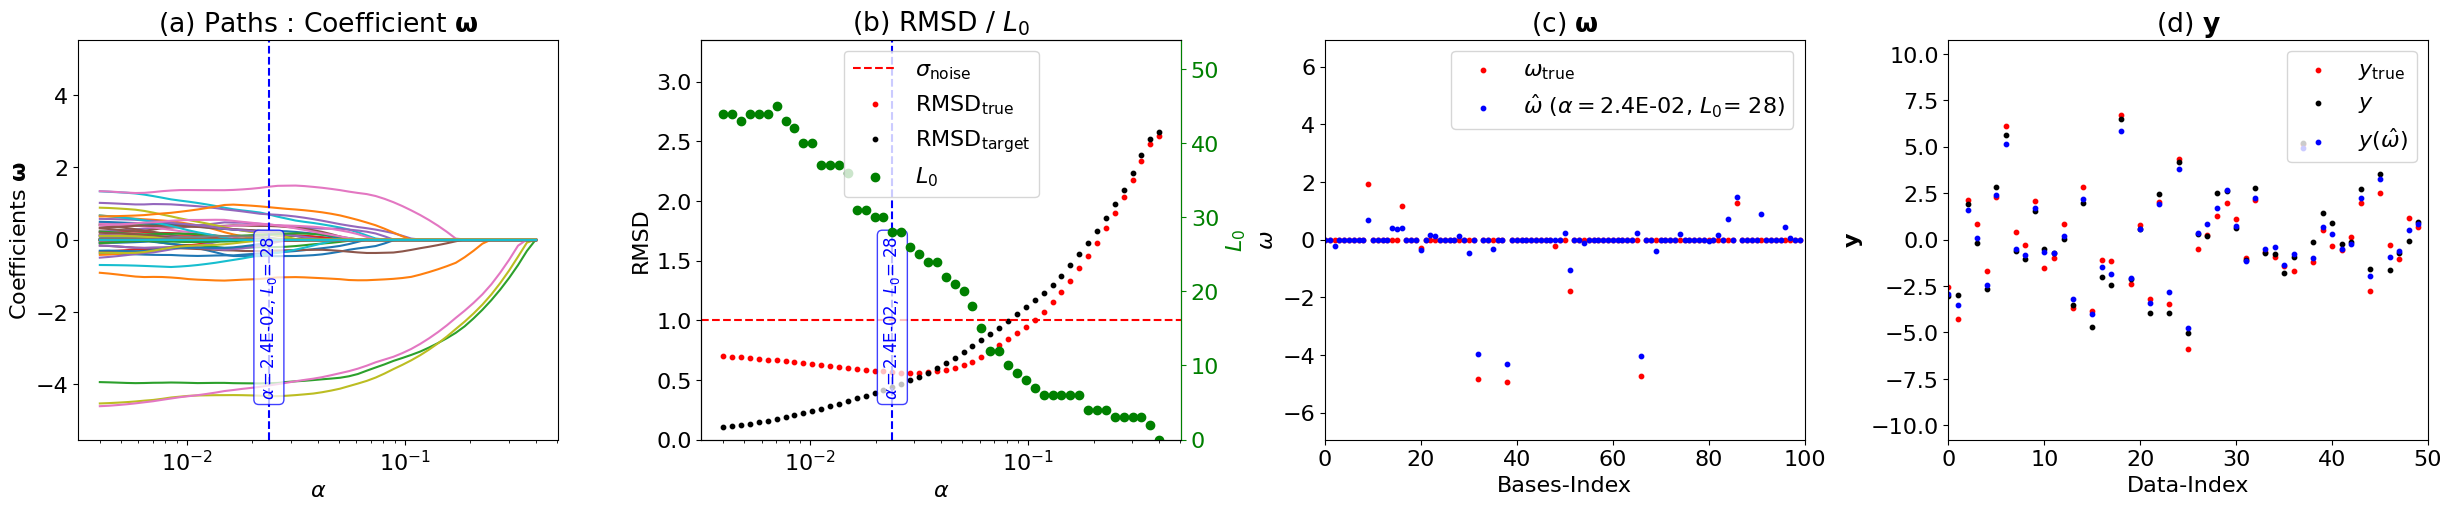

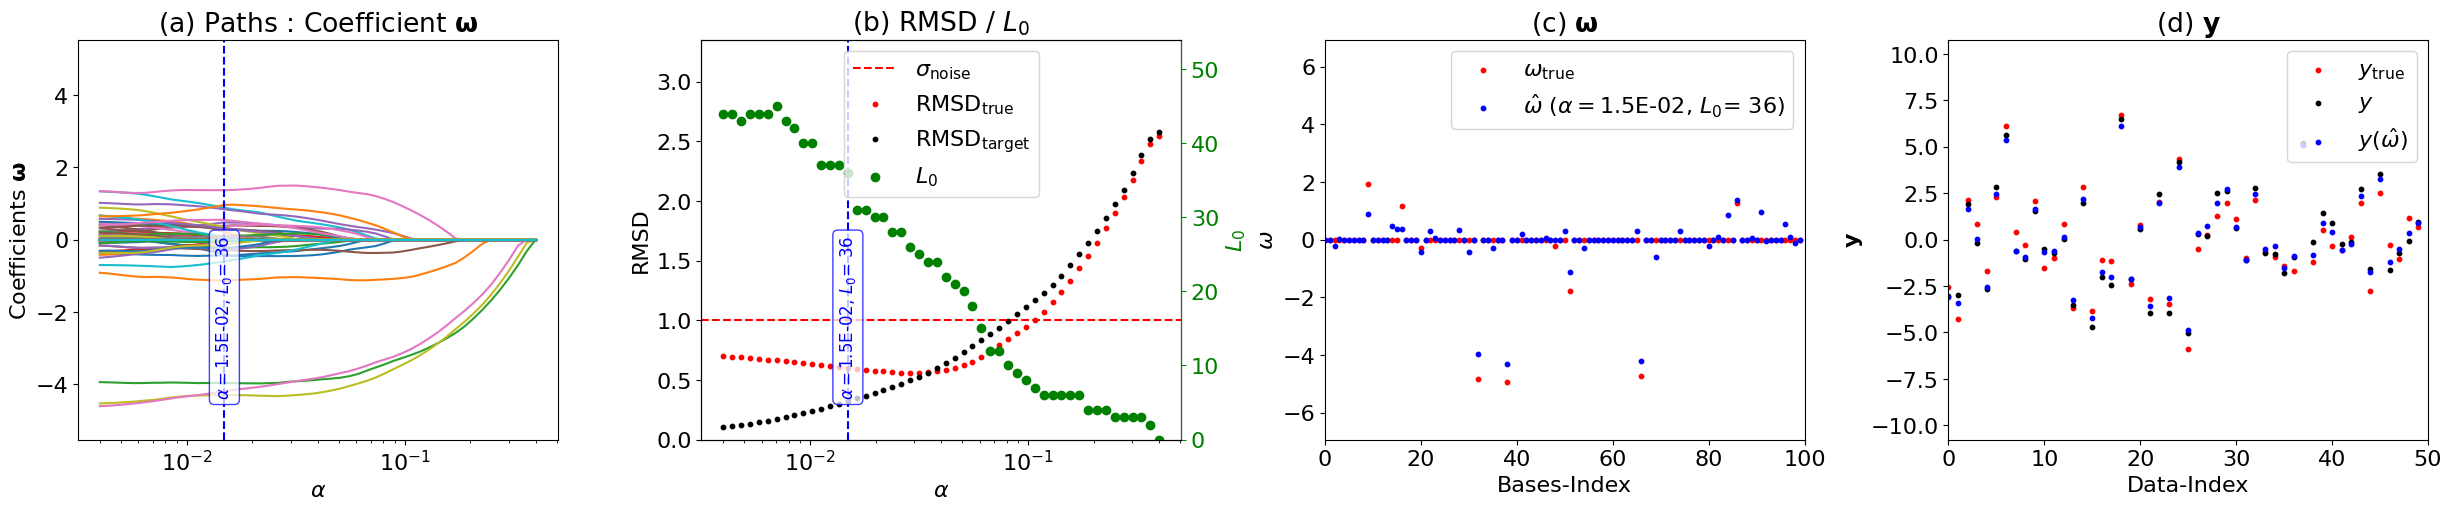

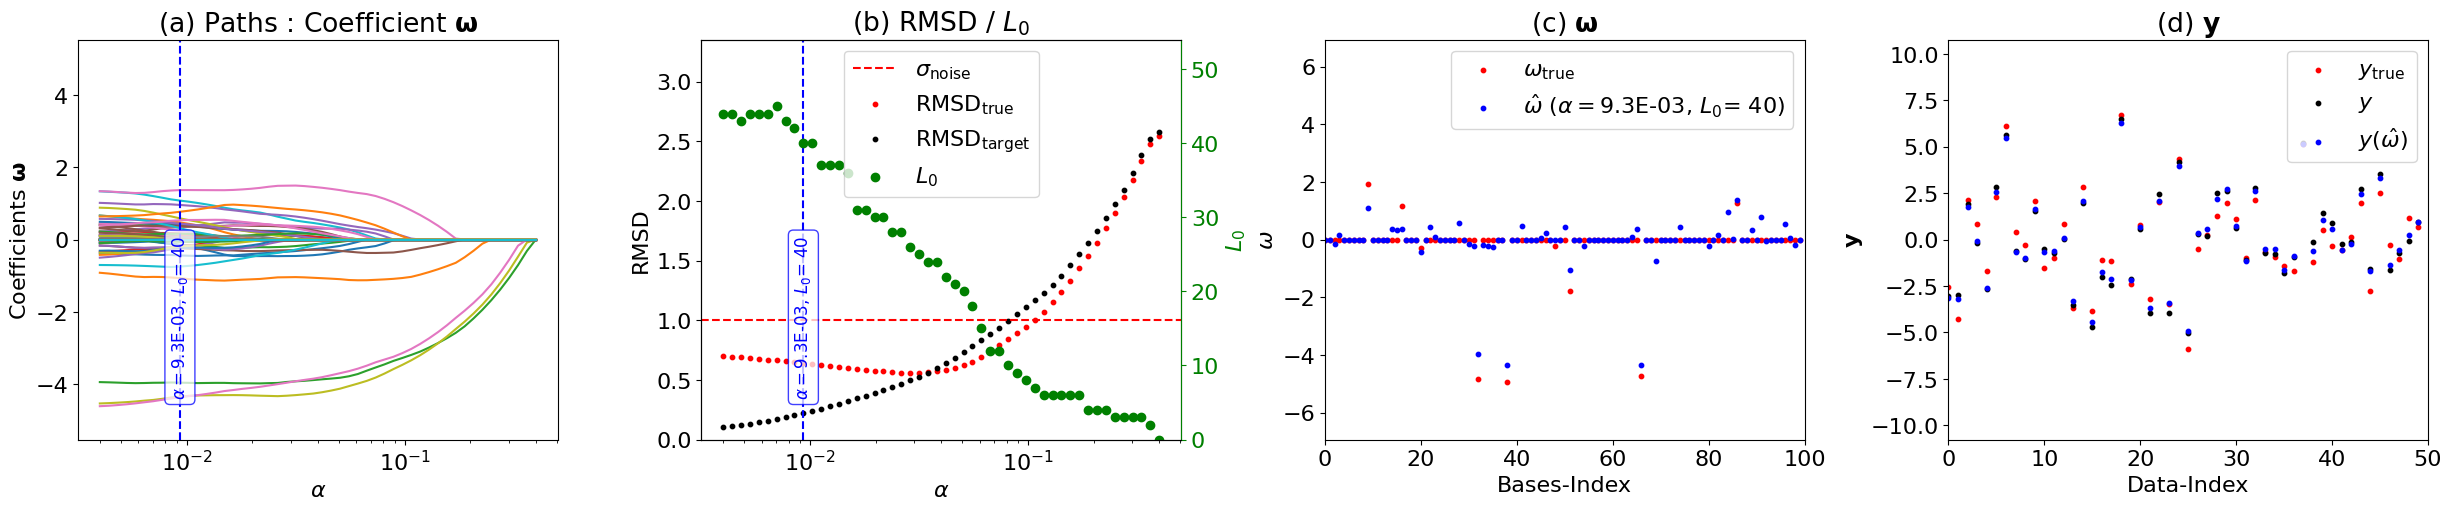

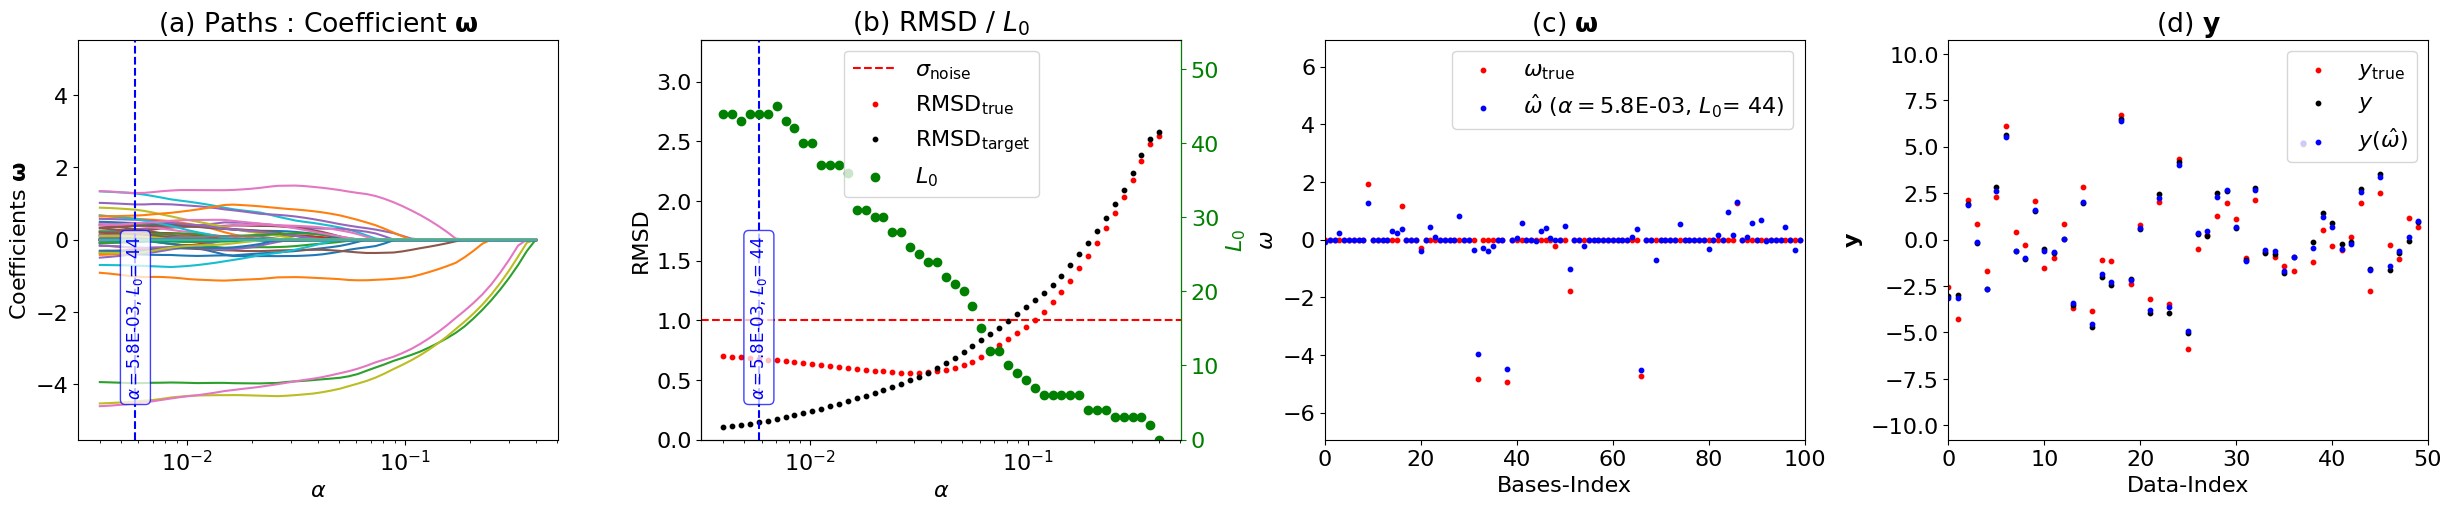

In [27]:
############################################
for idx in range( alphas.size ):
  if idx % 5 == 0:
    fig = Grf_LASSO_Summary( idx )
    fig.savefig( FilePath + FileBaseName + '-LASSO-Summary-%03d.pdf' % idx )